## Бутстрап
Бутстрап позволяет многократно извлекать подвыборки из выборки, полученной в рамках экспериментва

В полученных подвыборках считаются статистики (среднее, медиана и т.п.)

Из статистик можно получить ее распределение и взять доверительный интервал

ЦПТ, например, не позволяет строить доверительные интервал для медианы, а бутстрэп это может сделать

In [49]:
import numpy as np
import pandas as pd
from scipy.stats import norm, mannwhitneyu
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

plt.style.use('ggplot')

In [51]:
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        
        samples_1 = data_column_1.sample(boot_len, replace = True ).values # параметр возвращения
        samples_2 = data_column_2.sample(boot_len, replace = True).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    #Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

In [52]:
# будем пробовать бутстрап на эксп. распределении
np.random.seed(5)

n = 10000
lift = 1.01

x = np.random.exponential(size=n)
y = np.random.exponential(size=n) * lift

df = pd.DataFrame({"x": x, "y": y})
df.head()
print(x)

[0.25101998 2.04586988 0.23157797 ... 0.59513989 0.36989503 1.158228  ]


  0%|          | 0/2000 [00:00<?, ?it/s]

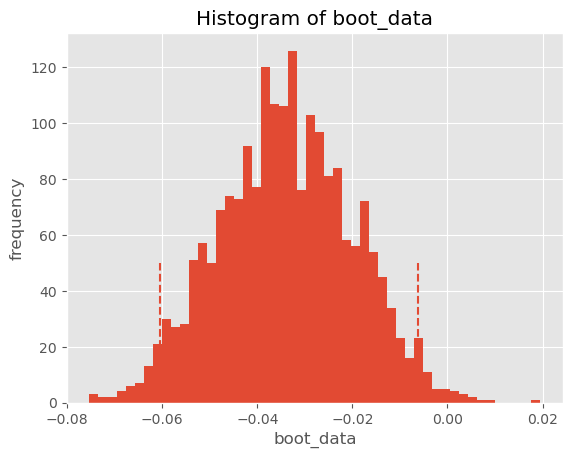

In [53]:
booted_data = get_bootstrap(df.x, df.y, boot_it = 2000) # в результате хранится разница двух распределений, ДИ и pvalue

In [55]:
booted_data["p_value"]

0.015967841910844854

In [56]:
booted_data["ci"]

,0
0.025,-0.060541
0.975,-0.006225


In [57]:
hw = pd.read_csv('hw_bootstrap.csv', decimal = ",", sep=";")
#orders.head()
hw.head()

,Unnamed: 0,value,experimentVariant
0,1,10.380495,Control
1,2,9.546867,Control
2,3,11.088215,Control
3,4,10.147274,Control
4,5,9.789808,Control


In [58]:
x= hw['value'][(hw['experimentVariant']=='Control')]

y= hw['value'][(hw['experimentVariant']=='Treatment')]

res_mw = mannwhitneyu (x, y, alternative='two-sided')


  0%|          | 0/1000 [00:00<?, ?it/s]

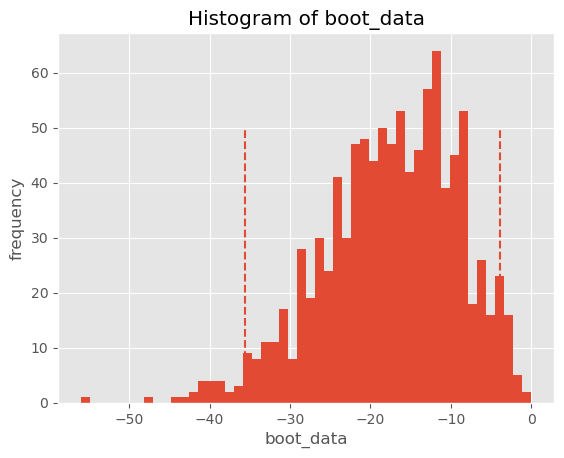

  0%|          | 0/1000 [00:00<?, ?it/s]

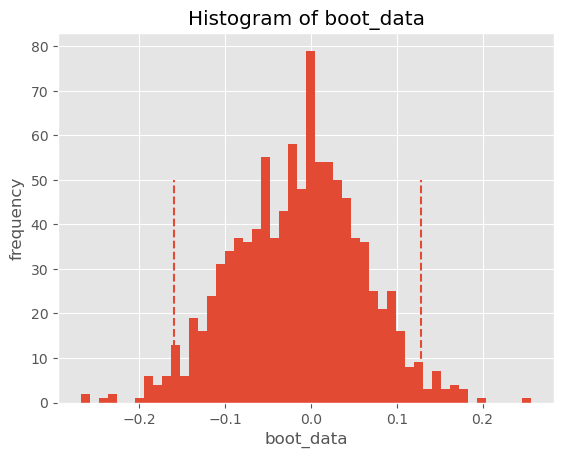

Boot mean: 0.0383302118301072, Bootmedian: 0.8453254813614638 , MW: 0.8592148582485579 


  0%|          | 0/1000 [00:00<?, ?it/s]

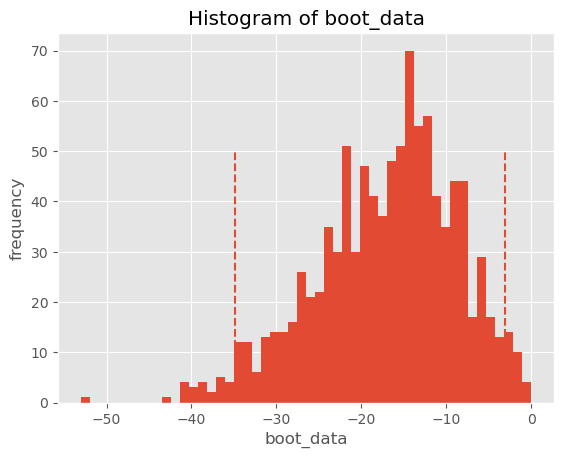

  0%|          | 0/1000 [00:00<?, ?it/s]

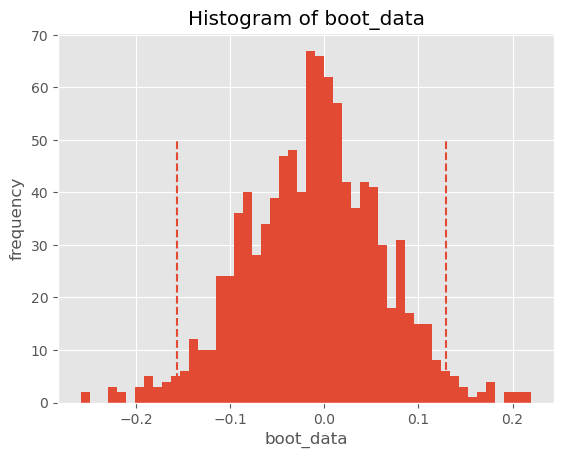

Boot mean: 0.038889908118115435, Bootmedian: 0.8792318830772975 , MW: 0.8592148582485579 


  0%|          | 0/1000 [00:00<?, ?it/s]

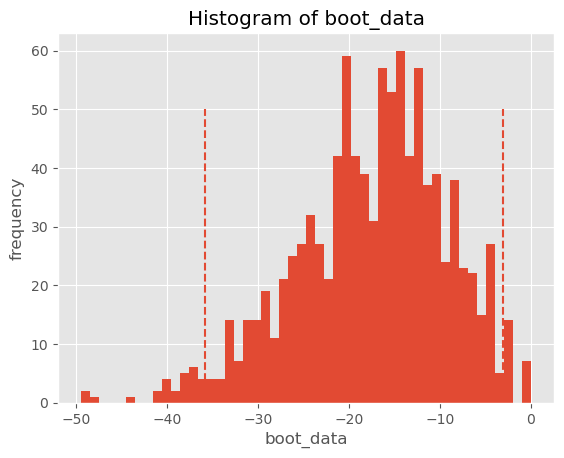

  0%|          | 0/1000 [00:00<?, ?it/s]

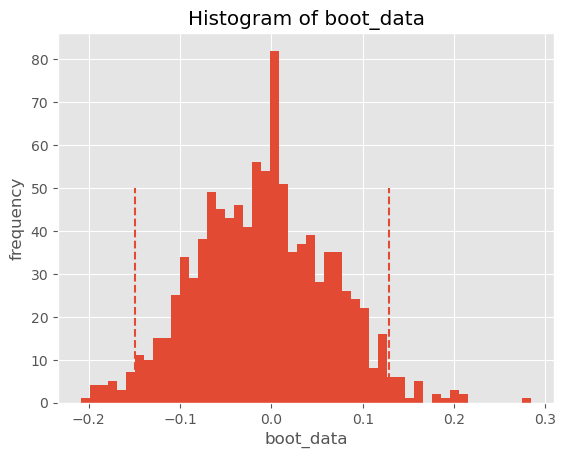

Boot mean: 0.03701017465401895, Bootmedian: 0.9007503493969335 , MW: 0.8592148582485579 


  0%|          | 0/1000 [00:00<?, ?it/s]

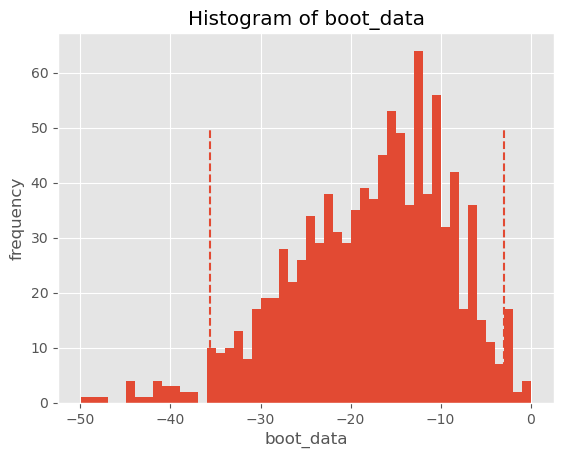

  0%|          | 0/1000 [00:00<?, ?it/s]

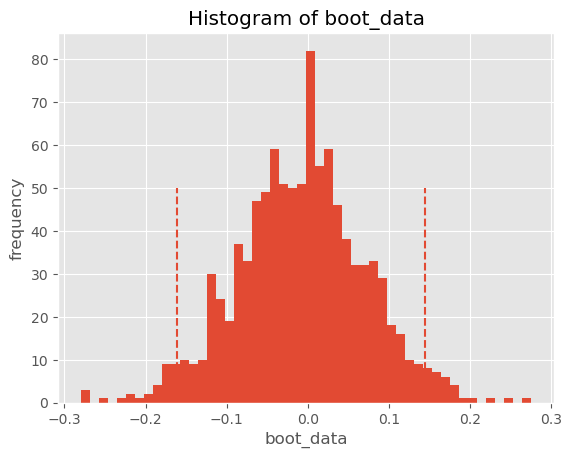

Boot mean: 0.041786941463822905, Bootmedian: 0.9205210012167137 , MW: 0.8592148582485579 


  0%|          | 0/1000 [00:00<?, ?it/s]

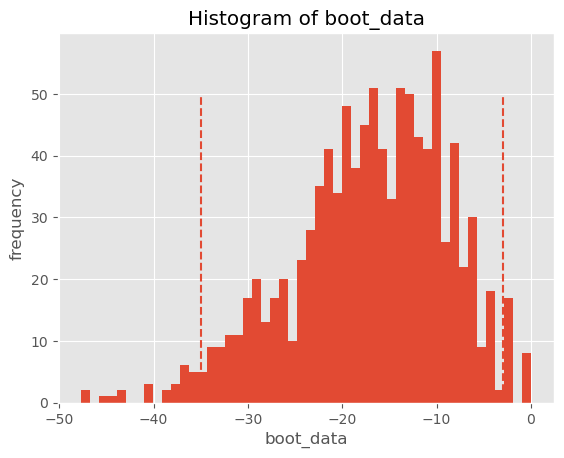

  0%|          | 0/1000 [00:00<?, ?it/s]

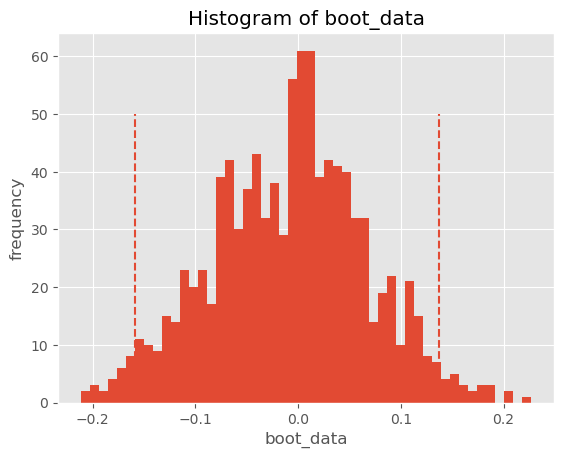

Boot mean: 0.03900749669019457, Bootmedian: 0.9095318001473218 , MW: 0.8592148582485579 


  0%|          | 0/1000 [00:00<?, ?it/s]

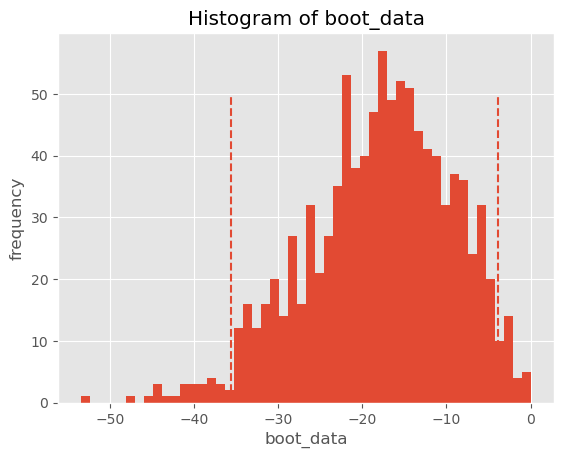

  0%|          | 0/1000 [00:00<?, ?it/s]

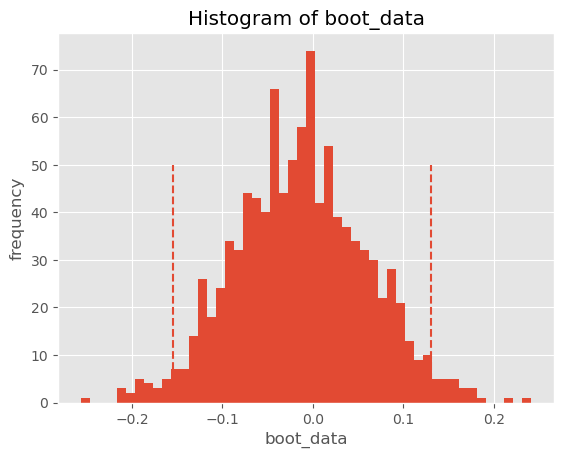

Boot mean: 0.03888420147322221, Bootmedian: 0.8594405532073233 , MW: 0.8592148582485579 


  0%|          | 0/1000 [00:00<?, ?it/s]

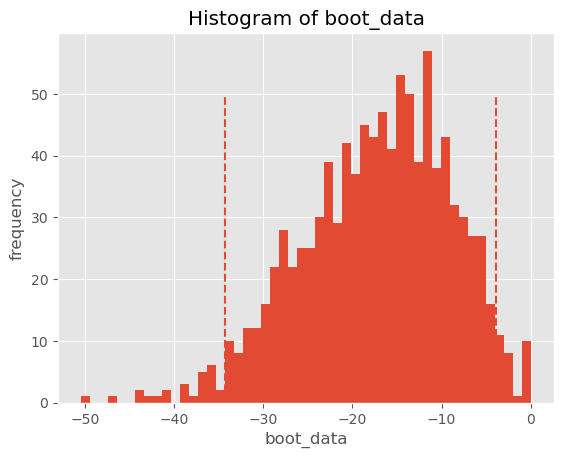

  0%|          | 0/1000 [00:00<?, ?it/s]

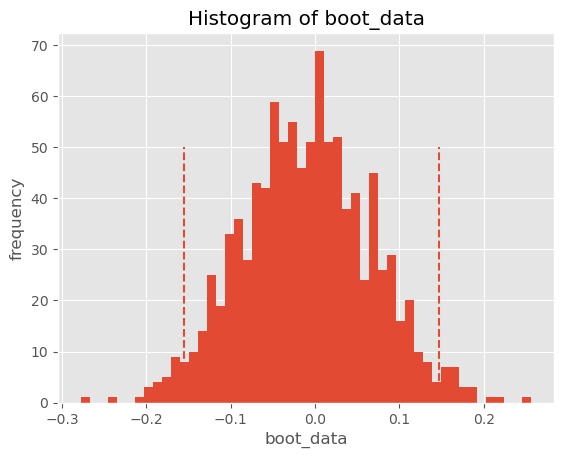

Boot mean: 0.03738640730136272, Bootmedian: 0.895916453380868 , MW: 0.8592148582485579 


  0%|          | 0/1000 [00:00<?, ?it/s]

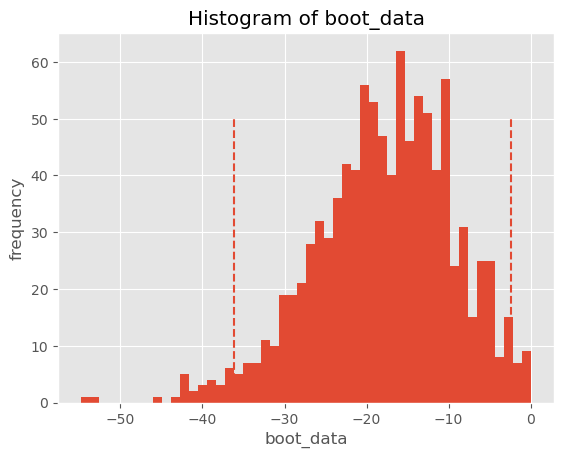

  0%|          | 0/1000 [00:00<?, ?it/s]

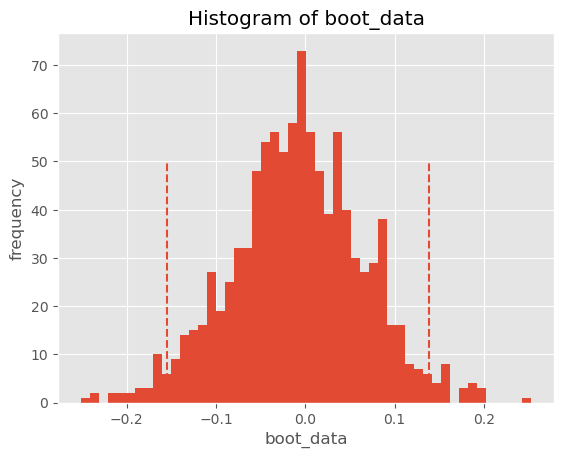

Boot mean: 0.03574627359651596, Bootmedian: 0.9092478628415056 , MW: 0.8592148582485579 


  0%|          | 0/1000 [00:00<?, ?it/s]

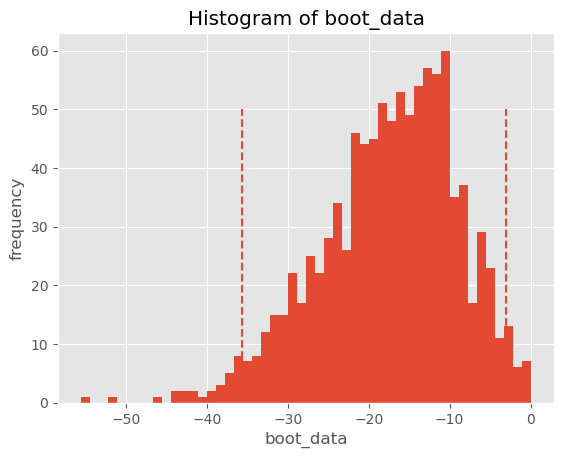

  0%|          | 0/1000 [00:00<?, ?it/s]

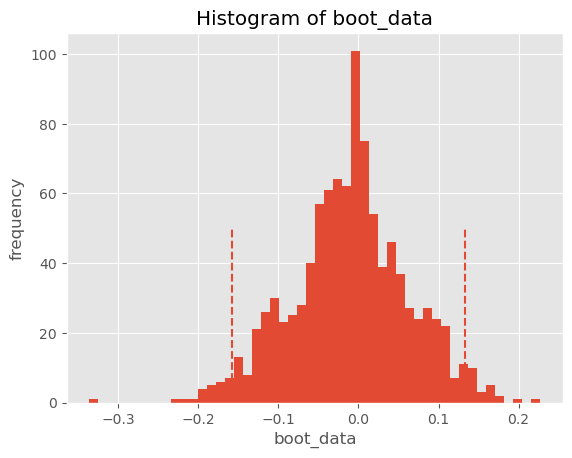

Boot mean: 0.04028957373598251, Bootmedian: 0.8847226419425472 , MW: 0.8592148582485579 


  0%|          | 0/1000 [00:00<?, ?it/s]

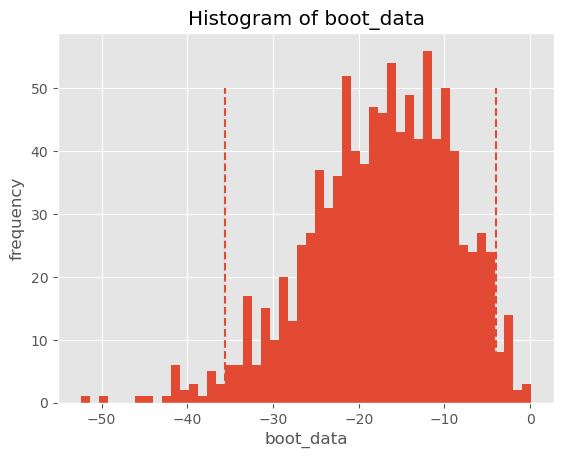

  0%|          | 0/1000 [00:00<?, ?it/s]

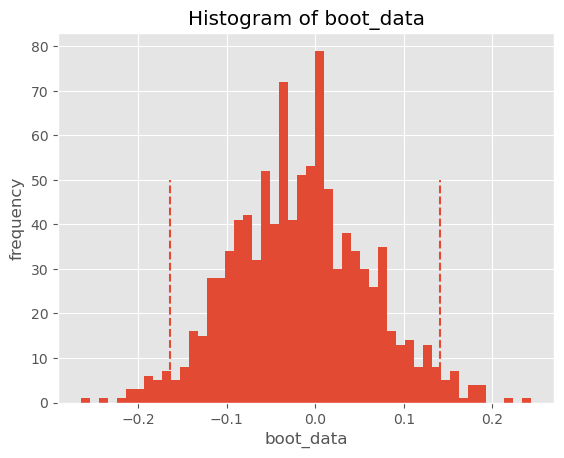

Boot mean: 0.037111212538432366, Bootmedian: 0.8256899056333771 , MW: 0.8592148582485579 


In [59]:
for i in range (10):
    res_b_npmean = get_bootstrap(x, y, statistic = np.mean)
    res_b_npmedian = get_bootstrap(x, y, statistic = np.median)
    print (f'Boot mean: {res_b_npmean["p_value"]}, Bootmedian: {res_b_npmedian["p_value"]} , MW: {res_mw.pvalue} ') 